In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
fi = pd.read_csv('/content/drive/MyDrive/Ramagundam.csv')
print(fi.shape)
fi


(10, 10)


,S.No.,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),TDS (mg/L),EC,TSS (mg/L),Year
0,1,5.90,8.18,5.3,23.0,20.0,328.0,565,7,2014
1,2,6.00,8.12,3.3,13.0,24.0,352.0,536,14,2015
2,3,5.10,8.18,4.0,24.0,28.0,298.0,464,17,2016
3,4,5.00,8.12,4.0,9.0,25.0,364.0,563,12,2017
4,5,5.10,7.93,3.0,8.0,17.0,412.0,571,9,2018
5,6,5.00,8.02,3.0,7.0,25.0,348.0,678,6,2019
6,7,5.40,8.07,2.5,11.0,23.0,299.0,487,13,2020
7,8,5.30,8.00,2.3,7.0,19.0,292.0,482,10,2021
8,9,5.80,8.28,1.2,9.0,13.0,340.0,549,15,2022
9,10,5.41,8.43,2.1,6.2,29.9,373.6,625,11,2023


In [ ]:
cols = list(fi)[1:8]
print(cols)

['DO (mg/L)', 'pH', 'BOD (mg/L)', 'Turbidity (NTU)', 'COD (mg/L)', 'TDS (mg/L)', 'EC']


<Axes: >

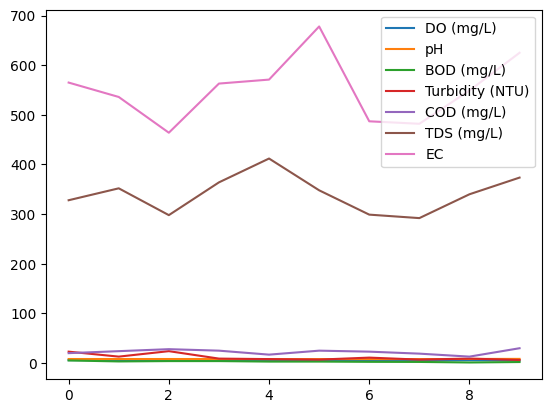

In [ ]:
df_for_training = fi[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),TDS (mg/L),EC
0,5.90,8.18,5.3,23.0,20.0,328.0,565.0
1,6.00,8.12,3.3,13.0,24.0,352.0,536.0
2,5.10,8.18,4.0,24.0,28.0,298.0,464.0
3,5.00,8.12,4.0,9.0,25.0,364.0,563.0
4,5.10,7.93,3.0,8.0,17.0,412.0,571.0
5,5.00,8.02,3.0,7.0,25.0,348.0,678.0
6,5.40,8.07,2.5,11.0,23.0,299.0,487.0
7,5.30,8.00,2.3,7.0,19.0,292.0,482.0
8,5.80,8.28,1.2,9.0,13.0,340.0,549.0
9,5.41,8.43,2.1,6.2,29.9,373.6,625.0


In [ ]:
n_future = 1
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []
trainYA = []
trainYB = []
trainYC = []
trainYD = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
  trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
  trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
  trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])
  trainYA.append(df_for_training_scaled[i + n_future - 1:i + n_future, 3])
  trainYB.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])
  trainYC.append(df_for_training_scaled[i + n_future - 1:i + n_future, 5])
  trainYD.append(df_for_training_scaled[i + n_future - 1:i + n_future, 6])


In [ ]:
print( trainX)
print(trainYP)

[array([[ 1.39469837,  0.34078556,  2.02551581,  1.82064358, -0.48898983,
        -0.3513198 ,  0.20819329],
       [ 1.67419704, -0.09425984,  0.2089097 ,  0.20659785,  0.32940319,
         0.3146893 , -0.2562379 ],
       [-0.841291  ,  0.34078556,  0.84472184,  1.98204815,  1.14779621,
        -1.18383118, -1.40930845]]), array([[ 1.67419704, -0.09425984,  0.2089097 ,  0.20659785,  0.32940319,
         0.3146893 , -0.2562379 ],
       [-0.841291  ,  0.34078556,  0.84472184,  1.98204815,  1.14779621,
        -1.18383118, -1.40930845],
       [-1.12078967, -0.09425984,  0.84472184, -0.43902044,  0.53400144,
         0.64769385,  0.17616356]]), array([[-0.841291  ,  0.34078556,  0.84472184,  1.98204815,  1.14779621,
        -1.18383118, -1.40930845],
       [-1.12078967, -0.09425984,  0.84472184, -0.43902044,  0.53400144,
         0.64769385,  0.17616356],
       [-0.841291  , -1.47190359, -0.06358121, -0.60042501, -1.10278459,
         1.97971205,  0.30428251]]), array([[-1.12078967, 

In [ ]:
trainX, trainYP, trainYN, trainYS,trainYA,trainYB,trainYC,trainYD= np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS),np.array(trainYA),np.array(trainYB),np.array(trainYC),np.array(trainYD)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))
print('trainYA shape == {}.'.format(trainYA.shape))
print('trainYB shape == {}.'.format(trainYB.shape))
print('trainYC shape == {}.'.format(trainYC.shape))
print('trainYD shape == {}.'.format(trainYD.shape))

trainX shape == (7, 3, 7).
trainYP shape == (7, 1).
trainYN shape == (7, 1).
trainYS shape == (7, 1).
trainYA shape == (7, 1).
trainYB shape == (7, 1).
trainYC shape == (7, 1).
trainYD shape == (7, 1).


In [ ]:
list1=[]

In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             18432     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 459ms/step - loss: 0.7223 - val_loss: 0.0022
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 0.7121 - val_loss: 0.0024
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6841 - val_loss: 0.0028
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6753 - val_loss: 0.0029
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6379 - val_loss: 0.0028
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6226 - val_loss: 0.0029
Epoch 7/50
2/2 [==============================] - 0s 59ms/step - loss: 0.5981 - val_loss: 0.0030
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5943 - val_loss: 0.0031
Epoch 9/50
2/2 [==============================] - 0s 56ms/step - loss: 0.5773 - val_loss: 0.0034
Epoch 10/50
2/2 [==============================] - 0s 38ms/step - loss: 0.5791 - val_loss: 0.0036
Epoch 11/50
2/2 [===========

In [ ]:
historyP = history

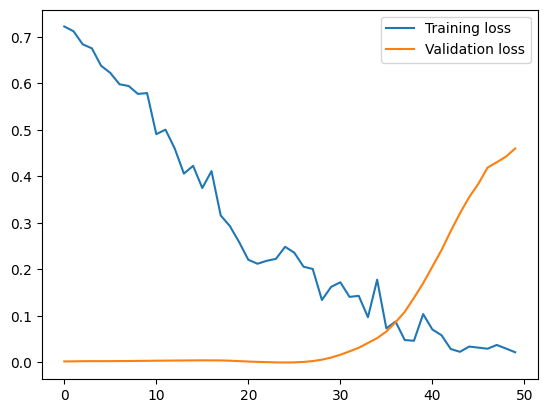

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 0s 358ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)

[5.0318494 5.1062446 4.9937973 5.289279  5.3412037 5.754076  5.65267  ]


In [ ]:
print(y_pred_futureP[-2])
i=y_pred_futureP[-2]
do=((i)*100/9)*0.3723
do

5.754076


23.802694403330488

In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 689ms/step - loss: 0.8200 - val_loss: 4.6498
Epoch 2/50
2/2 [==============================] - 0s 70ms/step - loss: 0.7914 - val_loss: 4.6749
Epoch 3/50
2/2 [==============================] - 0s 79ms/step - loss: 0.7713 - val_loss: 4.7044
Epoch 4/50
2/2 [==============================] - 0s 74ms/step - loss: 0.7735 - val_loss: 4.7189
Epoch 5/50
2/2 [==============================] - 0s 60ms/step - loss: 0.7371 - val_loss: 4.7386
Epoch 6/50
2/2 [==============================] - 0s 53ms/step - loss: 0.7328 - val_loss: 4.7553
Epoch 7/50
2/2 [==============================] - 0s 65ms/step - loss: 0.6945 - val_loss: 4.7739
Epoch 8/50
2/2 [==============================] - 0s 77ms/step - loss: 0.6817 - val_loss: 4.7862
Epoch 9/50
2/2 [==============================] - 0s 69ms/step - loss: 0.6615 - val_loss: 4.8023
Epoch 10/50
2/2 [==============================] - 0s 77ms/step - loss: 0.6435 - val_loss: 4.8234
Epoch 11/50
2/2 [===========

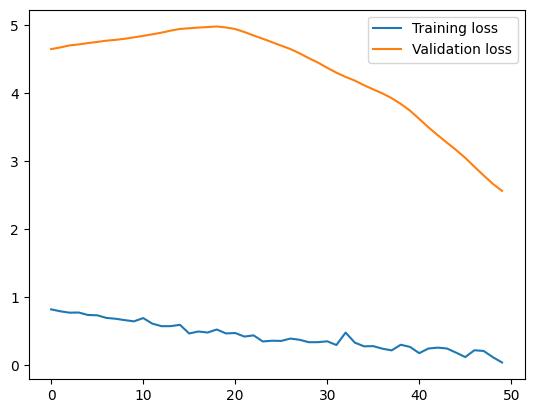

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX)

1/1 [==============================] - 0s 305ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
print(y_pred_futureN)

[8.06716   7.9968495 8.012405  8.052387  8.037866  8.258467  8.20917  ]


In [ ]:
print(y_pred_futureN[-2])
i=y_pred_futureN[-1]
ph=((i-7)*100/1.5)*0.1176

8.258467


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 471ms/step - loss: 0.7484 - val_loss: 0.7957
Epoch 2/50
2/2 [==============================] - 0s 45ms/step - loss: 0.7379 - val_loss: 0.7771
Epoch 3/50
2/2 [==============================] - 0s 49ms/step - loss: 0.6967 - val_loss: 0.7638
Epoch 4/50
2/2 [==============================] - 0s 57ms/step - loss: 0.6985 - val_loss: 0.7482
Epoch 5/50
2/2 [==============================] - 0s 50ms/step - loss: 0.6985 - val_loss: 0.7306
Epoch 6/50
2/2 [==============================] - 0s 42ms/step - loss: 0.6665 - val_loss: 0.7136
Epoch 7/50
2/2 [==============================] - 0s 39ms/step - loss: 0.6576 - val_loss: 0.6983
Epoch 8/50
2/2 [==============================] - 0s 61ms/step - loss: 0.6543 - val_loss: 0.6821
Epoch 9/50
2/2 [==============================] - 0s 40ms/step - loss: 0.6063 - val_loss: 0.6662
Epoch 10/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6196 - val_loss: 0.6507
Epoch 11/50
2/2 [===========

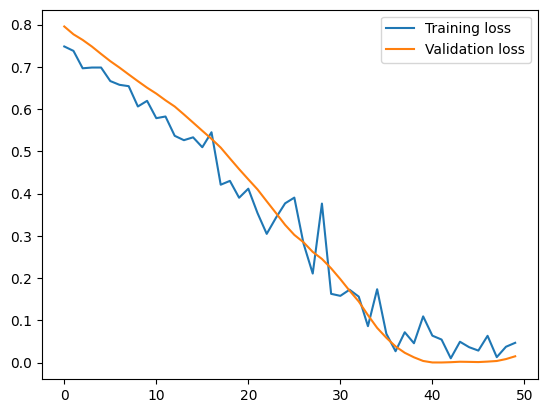

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 1s 1s/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[3.74302   3.1436565 2.9154284 2.5740292 2.192095  1.4426306 1.9662246]


In [ ]:
i=y_pred_futureS[-2]
bod=(i*100/25)*0.3723
print(i)

1.4426306


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYA.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 6s 897ms/step - loss: 0.7481 - val_loss: 0.7378
Epoch 2/50
2/2 [==============================] - 0s 77ms/step - loss: 0.7289 - val_loss: 0.7150
Epoch 3/50
2/2 [==============================] - 0s 185ms/step - loss: 0.6959 - val_loss: 0.6985
Epoch 4/50
2/2 [==============================] - 0s 83ms/step - loss: 0.6928 - val_loss: 0.6809
Epoch 5/50
2/2 [==============================] - 0s 109ms/step - loss: 0.6837 - val_loss: 0.6658
Epoch 6/50
2/2 [==============================] - 0s 85ms/step - loss: 0.6769 - val_loss: 0.6493
Epoch 7/50
2/2 [==============================] - 0s 106ms/step - loss: 0.6640 - val_loss: 0.6324
Epoch 8/50
2/2 [==============================] - 0s 66ms/step - loss: 0.6463 - val_loss: 0.6137
Epoch 9/50
2/2 [==============================] - 0s 90ms/step - loss: 0.6348 - val_loss: 0.5944
Epoch 10/50
2/2 [==============================] - 0s 83ms/step - loss: 0.6269 - val_loss: 0.5735
Epoch 11/50
2/2 [========

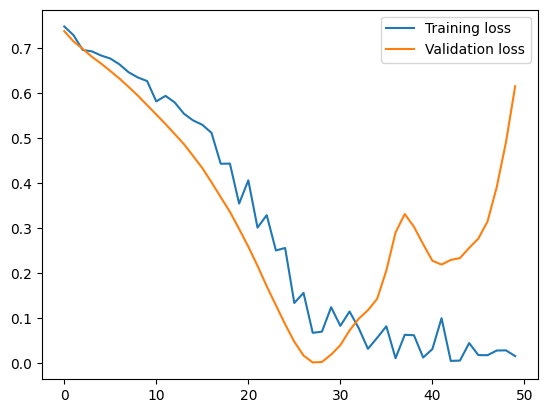

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 1s 652ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[3.8452425 3.1004074 2.9340758 2.5798006 2.177683  1.0996156 1.2363287]


In [ ]:
i=y_pred_futureS[-2]
tur=(i*100/5)*0.1
print(tur)

2.1992311477661133


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYB.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 405ms/step - loss: 0.7554 - val_loss: 0.7587
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 0.7163 - val_loss: 0.7393
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 0.7028 - val_loss: 0.7186
Epoch 4/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6951 - val_loss: 0.6991
Epoch 5/50
2/2 [==============================] - 0s 42ms/step - loss: 0.7033 - val_loss: 0.6799
Epoch 6/50
2/2 [==============================] - 0s 53ms/step - loss: 0.6783 - val_loss: 0.6615
Epoch 7/50
2/2 [==============================] - 0s 39ms/step - loss: 0.6669 - val_loss: 0.6438
Epoch 8/50
2/2 [==============================] - 0s 40ms/step - loss: 0.6538 - val_loss: 0.6278
Epoch 9/50
2/2 [==============================] - 0s 39ms/step - loss: 0.6213 - val_loss: 0.6096
Epoch 10/50
2/2 [==============================] - 0s 66ms/step - loss: 0.6229 - val_loss: 0.5916
Epoch 11/50
2/2 [===========

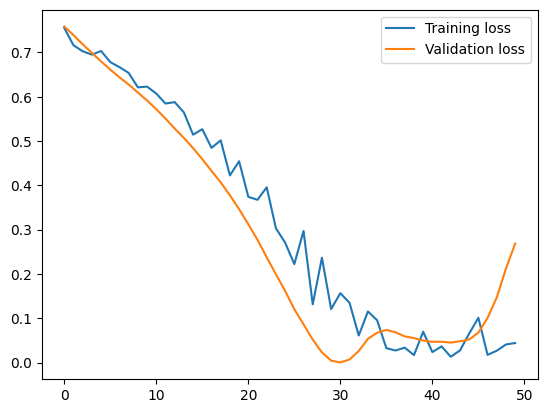

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 358ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)
i=y_pred_futureS[-2]
cod=(i*100/10)*0.12
print(cod)

[4.024354  3.1465907 2.909688  2.5977168 2.156462  1.1950535 1.5295258]
1.4340641498565674


In [ ]:
l=[do,ph,bod,tur,cod]
print(l)
print(sum(l))

[23.802694403330488, 9.47989547729492, 2.148365561914444, 2.1992311477661133, 1.4340641498565674]
39.064250740162535


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYC.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 660ms/step - loss: 0.7766 - val_loss: 0.0019
Epoch 2/50
2/2 [==============================] - 0s 58ms/step - loss: 0.7431 - val_loss: 0.0022
Epoch 3/50
2/2 [==============================] - 0s 65ms/step - loss: 0.7428 - val_loss: 0.0024
Epoch 4/50
2/2 [==============================] - 0s 85ms/step - loss: 0.7218 - val_loss: 0.0028
Epoch 5/50
2/2 [==============================] - 0s 77ms/step - loss: 0.7019 - val_loss: 0.0032
Epoch 6/50
2/2 [==============================] - 0s 65ms/step - loss: 0.7022 - val_loss: 0.0036
Epoch 7/50
2/2 [==============================] - 0s 51ms/step - loss: 0.6927 - val_loss: 0.0041
Epoch 8/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6580 - val_loss: 0.0044
Epoch 9/50
2/2 [==============================] - 0s 42ms/step - loss: 0.6514 - val_loss: 0.0048
Epoch 10/50
2/2 [==============================] - 0s 45ms/step - loss: 0.6843 - val_loss: 0.0049
Epoch 11/50
2/2 [===========

In [ ]:
historyP = history

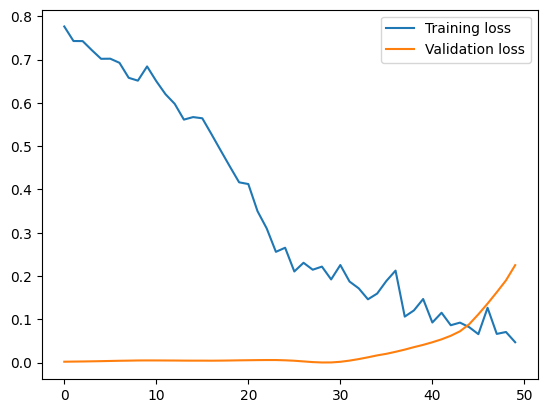

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 0s 339ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)
ec=y_pred_futureP[-2]
print(ec)

[5.0015626 5.094821  5.0079117 5.3403316 5.3756323 5.7326756 5.579733 ]
5.7326756


In [ ]:
l=[do,ph,bod,tur,cod,ec]
print(l)
WQI=sum(l)
print(WQI)

[23.802694403330488, 9.47989547729492, 2.148365561914444, 2.1992311477661133, 1.4340641498565674, 5.7326756]
44.7969262925307


In [ ]:
def get_WQI_bucket(x):
    if x>=0 and x <= 25:
        return "Excellent"
    elif x>=26 and x<=50:
        return "Good"
    elif x >=51 and x<=75:
        return "Poor"
    elif x>=76 and x<100:
        return "Very Poor"
    else:
        return "Not Suitable for drinking"
result=get_WQI_bucket(WQI)
print(result)

Good


In [ ]:
def calculate(i,col):
  # DO (mg/L)
  if(col== 0):
    return ((i-14)*100/9)*0.3723
  #ph
  if(col==1):
    return ((i-7)*100/1.5)*0.1176
  #BOD (mg/L)
  if(col==2):
    return (i*100/5)*0.3723
  #Turbidity (NTU)
  if(col==3):
    return (i*100/5)*0.1
  #COD (mg/L)
  if(col==4):
    return (i*100/10)*0.12
  #TDS (mg/L)
  if(col==5):
    return (i*100/1000)*0.001
  else:
     #Electrical conductivity
    return ((i)/300)*0.0033

In [ ]:
l1=[6.0,7.82,1.8,8,24,450,702]
wqi_index=0
for i in range(len(l1)):
   wqi_index+=calculate(l1[i],i)
print(wqi_index)

31.590988666666668
